# Lets learn Univariant Linear regression - Least Squares method
- Linear regression can be performed through several methods like least squares, gradient descendent, etc.
- In this we are going to use least squares method.
- it can be used for small datasets, where parameter/columns are less.

In [106]:
#import universe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [107]:
df = pd.read_csv("Salary_Data.csv")

In [108]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [110]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


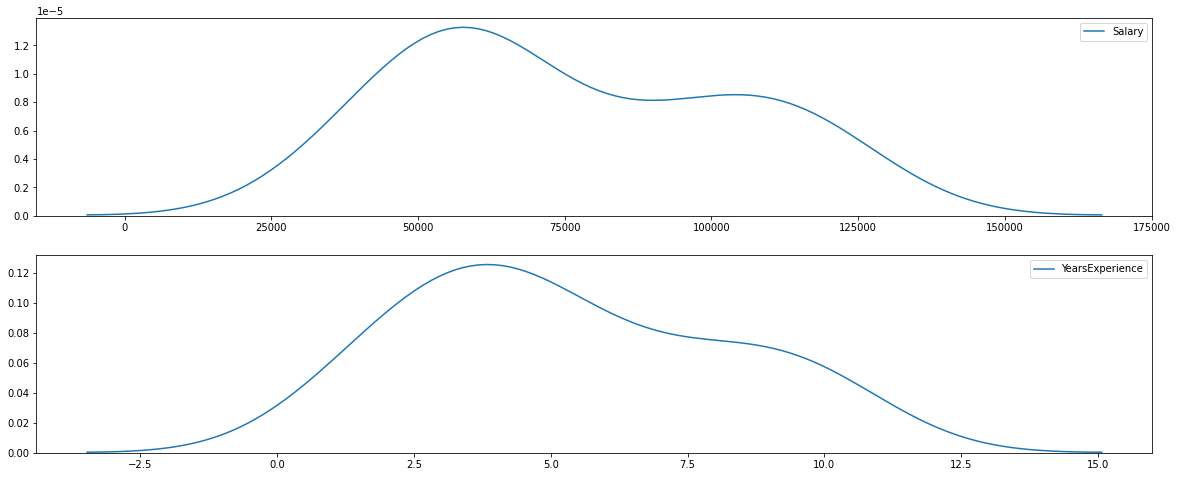

In [111]:
fig, axes = plt.subplots(ncols = 1,nrows = 2)
fig.set_size_inches(20,8)
sns.kdeplot(df['Salary'], ax=axes[0])
sns.kdeplot(df['YearsExperience'], ax=axes[1])


{'whiskers': [<matplotlib.lines.Line2D at 0x1a30fd77a08>,
 'caps': [<matplotlib.lines.Line2D at 0x1a30fd77fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a30fd56688>],
 'medians': [<matplotlib.lines.Line2D at 0x1a30fd7fc48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a30fd7fd88>],
 'means': []}

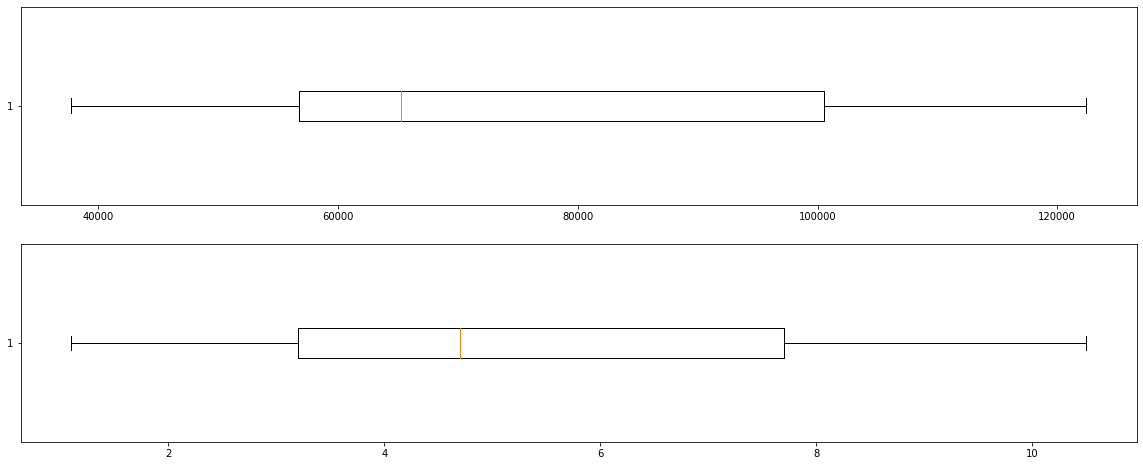

In [112]:
fig, axes = plt.subplots(ncols = 1,nrows = 2)
fig.set_size_inches(20,8)
axes[0].boxplot(df['Salary'], vert=False)
axes[1].boxplot(df['YearsExperience'], vert = False)


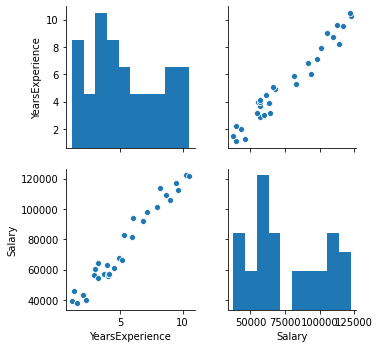

In [113]:
sns.pairplot(df)

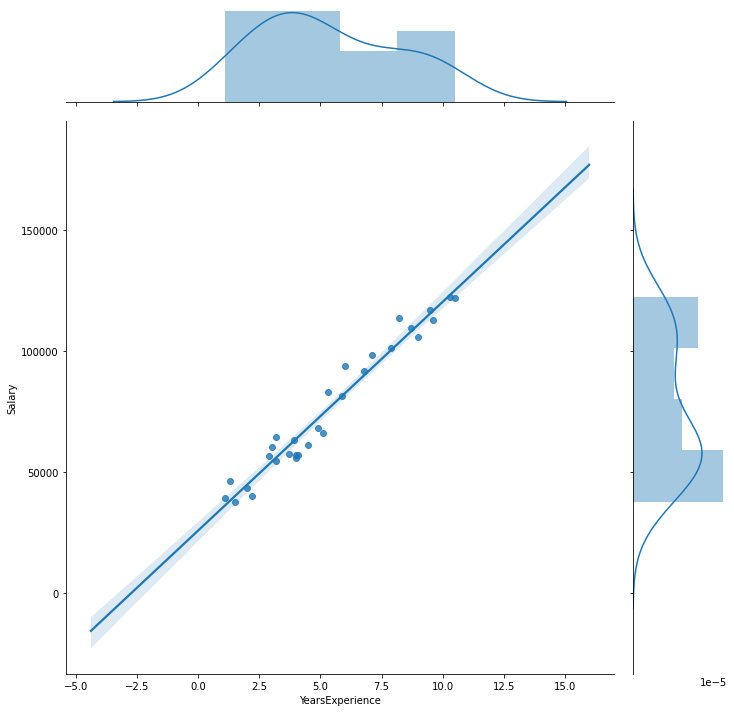

In [128]:
sns.jointplot('YearsExperience', 'Salary', data=df, kind='reg', height=10 )

In [29]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Regression model - least squares method

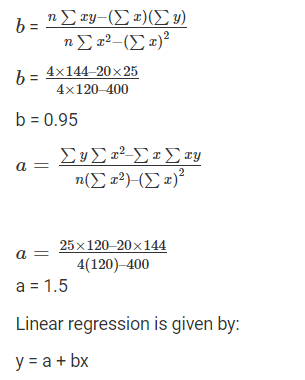

In [129]:
#rename columns
df.rename(columns={'YearsExperience' : 'x' ,'Salary':'y'}, inplace=True)

In [130]:
train = df.sample(frac=0.7, random_state=100)
test = df.drop(train.index)

In [131]:
train['x2'] =  train['x'] * train['x']
train['xy'] = train['x'] * train['y']

In [132]:
n = train.shape[0]
n

21

In [133]:
m = ( (n* train['xy'].sum()) - (train['x'].sum() * train['y'].sum())) / ((n * train['x2'].sum()) - ((train['x'].sum())**2))
m

9296.172461164537

In [134]:
#y = 25202.8 + 9731.2x

In [135]:
c = ((train['y'].sum() * train['x2'].sum()) - (train['x'].sum() * train['xy'].sum()) ) / ((n* train['x2'].sum()) - (train['x'].sum()**2) )
c

26253.478233520953

In [136]:
train['predicted_y'] = m * train['x'] + c

In [137]:
train

,x,y,x2,xy,predicted_y
9,3.7,57189.0,13.69,211599.3,60649.316340
26,9.5,116969.0,90.25,1111205.5,114567.116615
28,10.3,122391.0,106.09,1260627.3,122004.054584
13,4.1,57081.0,16.81,234032.1,64367.785324
5,2.9,56642.0,8.41,164261.8,53212.378371
12,4.0,56957.0,16.00,227828.0,63438.168078
27,9.6,112635.0,92.16,1081296.0,115496.733861
25,9.0,105582.0,81.00,950238.0,109919.030384
6,3.0,60150.0,9.00,180450.0,54141.995617
17,5.3,83088.0,28.09,440366.4,75523.192278


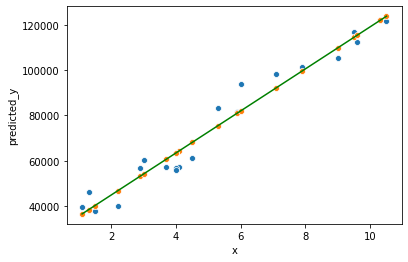

In [150]:
fig, ax = plt.subplots()
sns.scatterplot(data = train, x ='x' , y = 'y', ax = ax)
sns.scatterplot(data = train, x ='x' , y = 'predicted_y', ax = ax)
sns.lineplot(data = train, x ='x' , y = 'predicted_y', ax = ax, color='g')


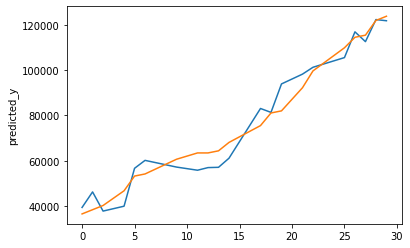

In [143]:
fig, ax = plt.subplots()
sns.lineplot(data = train, x =train.index , y = 'y', ax = ax)
sns.lineplot(data = train, x =train.index , y = 'predicted_y', ax = ax)

### lets predict for test data

In [157]:
test['predicted_y'] = m * test['x'] + c
test

,x,y,predicted_y
3,2.0,43525.0,44845.823156
7,3.2,54445.0,56001.230109
8,3.2,64445.0,56001.230109
10,3.9,63218.0,62508.550832
15,4.9,67938.0,71804.723293
16,5.1,66029.0,73663.957785
20,6.8,91738.0,89467.450969
23,8.2,113812.0,102482.092415
24,8.7,109431.0,107130.178646


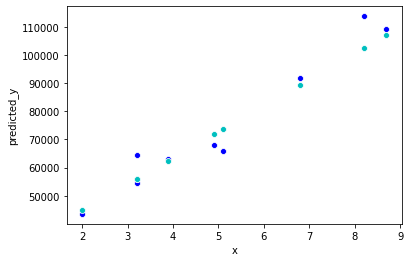

In [161]:
fig, ax = plt.subplots()
sns.scatterplot(data = test, x ='x' , y = 'y', ax = ax, color = 'b')
sns.scatterplot(data = test, x ='x' , y = 'predicted_y', ax = ax, color = 'c')

### Error metrics

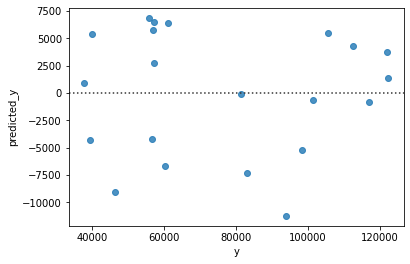

In [162]:
sns.residplot('y', 'predicted_y', data=train)

In [169]:
train['y'] - train['predicted_y']


9     -3460.316340
26     2401.883385
28      386.945416
13    -7286.785324
5      3429.621629
12    -6481.168078
27    -2861.733861
25    -4337.030384
6      6008.004383
17     7564.807722
22     1608.759323
11    -7644.168078
4     -6814.057648
29    -1991.289076
0      2863.732059
1      7866.497567
18      262.104246
14    -6975.254309
19    11909.486999
21     6016.697292
2     -2466.736925
dtype: float64